# ENPH 213 - Week 6 Lab

In this lab, we will be working on interpolating between finite data sets using a variety of different methods while continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab6, where LastName is your last name.  Submit that file to onQ.  Also, include your Lab4.py file (or similar) to ensure that the notebook can run without error.

For marking Parts 1-4 will be marked together (Weighted out of 10) and Part 5 will be marked separately (Weighted out of 5).

## Part 1

Consider the data set consisting of the following $x$-values

0.5, 2.6, 3.8, 4.7, 5.6, 7.1, 8.9

and the corresponding $y$-values

0.01963664, 0.07507309, 0.23405139, 0.29202742, 0.13045487, 0.03839685, 0.01497929

Here in Part 1, you will interpolate the data using a polynomial.  Start by ensuring that you know what order of polynomial you should use.  Then, create the matrix that you need to diagonalize, and then call your BackSub(A, b) function from Lab 4 to solve for the polynomial coefficients.

For output, plot the interpolated function from $ x = $ 0 to 9.5, along with the points from the data set.  As well, output the interpolated values for the following $x$-values:

1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8


**Note: You will again need your BackSub(A,b) function from Lab 4.  Place the saved Lab4.py file in the same directory as this notebook, and use "from Lab4 import BackSub".  Submit the Lab4.py file with this notebook so that it can run when refreshed before marking.**

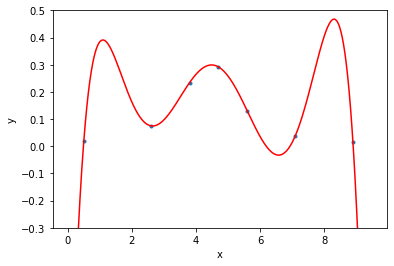

Desired Values:
[ 0.39100478  0.11685285  0.14257795  0.29797831  0.15497775 -0.03256824
  0.27578206  0.17655975]


In [6]:
import numpy as np
from matplotlib import pyplot as plt

#Dataset Values
x = np.array([0.5, 2.6, 3.8, 4.7, 5.6, 7.1, 8.9])
y = np.array([[0.01963664], [0.07507309], [0.23405139], [0.29202742], [0.13045487], [0.03839685], [0.01497929]])

#Use a polynomial of size len(x) (essentially 0:N-1 of the dataset)
#Gotta create the x array and y array first
xArray = np.meshgrid(x,x.transpose())[1]

#Exponentiate
for i in range(0,len(x)):
    xArray[:,i] = np.power(xArray[:,i],i)

yArray = y


#Now we have the x and y arrays that we want (of size 0:N-1)
#Now we need to use np.linalg.solve to figure out the coefficients of the 0:N-1 polynomial
Coeff = np.linalg.solve(xArray,yArray)

def Polynomial(xVal):
    y = np.zeros(len(xVal))
    for i in range(len(xVal)):
        y[i] = Coeff[0]
        for j in range(1,len(x)):
            y[i] += Coeff[j]*np.power(xVal[i],j)
            
    return y

#Now we gotta print out the graph with the points and the polynomial fit
xPlot = np.linspace(0,9.5,1000)
yPlot = Polynomial(xPlot) 

#Plot all that sauce
plt.figure(0)
plt.plot(x,y,'.')
plt.plot(xPlot,yPlot,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-0.3,0.5)
plt.show()

#Time to output the desired interpolated values
xInter = np.array([1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8])
yInter = Polynomial(xInter)
       
#Plot the values we want!
print("Desired Values:")
print(yInter)

# Part 2

Use the same (x,y) dataset from Part 1.

Here in Part 2, you will interpolate the data using Lagrange functions.  Start by ensuring that you know what order of polynomial you should use.  Then, create a function that can calculate the Lagrange function at a particular $x$ and $k$.  Use that function with appropriate coefficients in a sum to calculate the requested output.

For output, plot the interpolated function from 0 to 9.5, along with the points from the data set.  As well, output the interpolated values for the following $x$-values:

1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8

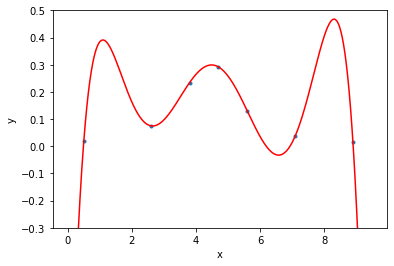

Desired Values:
[ 0.39100478  0.11685285  0.14257795  0.29797831  0.15497775 -0.03256824
  0.27578206  0.17655975]


In [7]:
#Here, we need langrange functions from L0->Ln-1
#This lagrange polynomial will be a sum of len(x) lagrange functions
#The lagrange polynomial will have a degree of n-1

#Takes in an array of given x values, xp (the evaluation point) and a number k (len(x)-1)
def Lagrange(x,xp,k):
    yp = 0
    LagFuncs = np.ones(k)
    for i in range(k+1):
        p=1
        for j in range(k+1):
            if j != i:
                p *= (xp-x[j])/(x[i]-x[j])
        yp += y[i]*p
    return yp

#Get the line of interpolated function values
yLag = Lagrange(x,xPlot,len(x)-1)

#Plot all that funky stuff
plt.figure(1)
plt.plot(x,y,'.')
plt.plot(xPlot,yLag,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-0.3,0.5)
plt.show()

#Time to output the desired interpolated values
yInterPrime = Lagrange(x,xInter,len(x)-1)
       
#PRINT!!!    
print("Desired Values:")
print(yInterPrime)

# Part 3

Use the same (x,y) dataset from Part 1.

Here in Part 3, you will interpolate the data using the cubic Spline method.  Start by ensuring that you know what size of matrix you should use (this is particularly important for this method).  Then, poplulate the matrix with the tri-diagonal elements.  Once completed, use your BackSub(A, b) function from Lab 4 to solve for the polynomial coefficients.  Use the coefficients to calculate the interpolated function in the different regions.

As above, plot the interpolated function from 0 to 9.5, along with the points from the data set. Ensure that all output is consistent with the method.  As well, output the interpolated values for the following $x$-values:

1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8

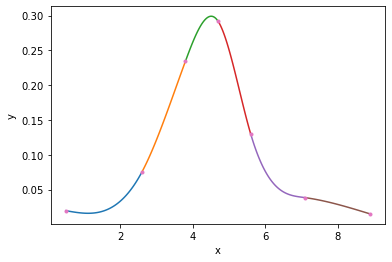

Desired Values:
[0.01589727 0.04369464 0.16200059 0.29675857 0.14924057 0.04414076
 0.03256115 0.01657488]


In [8]:
#We want to represent the second dereivative as a linear value (Use a lagrange polynomial)

#Create a n-2 element tridiagonal matrix (c0, cn-1 = 0 already)
M = np.zeros(len(x)-2)
M = np.meshgrid(M,M)[0]
b = np.zeros((len(M),1))

#Fill the matrix M with the tridiagonal content
for i in range(len(M)):
    M[i,i] = 2*(x[i+2]-x[i])
    if (i!=len(M)-1): M[i,i+1]=x[i+2]-x[i+1]
    if (i!=0): M[i,i-1]=x[i+1]-x[i]
        
#Create the b matrix using the equation from the notes
for i in range(1,len(b)+1):
    b[i-1,0] = 6*(((y[i+1]-y[i])/(x[i+1]-x[i]))-((y[i]-y[i-1])/(x[i]-x[i-1])))

#Solve for the c coefficients
c = np.linalg.solve(M,b)


#Append 0 to front and back (natural spline)
c = c.transpose()
C = np.append(np.array([0]),c)
C = np.append(C,np.array([0]))

#Function that returns the spline-interpolated y value using the equation from the notes
def Spline(xArr,k):
    res = 0
    
    #Terms 1 and 2
    res += (y[k-1]*((x[k]-xArr)/(x[k]-x[k-1])))+(y[k]*((xArr-x[k-1])/(x[k]-x[k-1]))) 
    
    #Term 3
    res-= ((C[k-1]/6)*(((x[k]-xArr)*(x[k]-x[k-1]))-(((x[k]-xArr)**3)/(x[k]-x[k-1]))))
    
    #Term 4
    res-= ((C[k]/6)*(((xArr-x[k-1])*(x[k]-x[k-1]))-(((xArr-x[k-1])**3)/(x[k]-x[k-1]))))
    
    return res


#This function will call spline with the proper k value (you need to find the right splined polynomial to call in the Spline Function)
def CalcCubicSpline(xVal):
    yVal = np.zeros(len(xVal))
    for i in range(len(xVal)):
        j = 0
        while (xVal[i] > x[j]):
            j+=1
        yVal[i] = Spline(xInter[i],j)
    return yVal
    
    
#This loops through and does each chunk of the interpolated function (between two x points)
for i in range(1,len(x)):
    xVals = np.linspace(x[i-1],x[i],100)
    Inter = Spline(xVals,i)
    plt.plot(xVals,Inter)

#Plot our given points (these should occur right on the colour change between polynomials)
plt.plot(x,y,'.')
plt.xlabel("x")
plt.ylabel("y")

plt.show()  

#Print Desired Values
yInts = CalcCubicSpline(xInter)

#Now, just print the array!
print("Desired Values:")    
print(yInts)  

# Part 4

Use the same (x,y) dataset from Part 1.

Here in Part 4, you will interpolate the data using a Fourier series / trigonometric functions.  Start by ensuring that you know what size of matrix you should use and the anticipated harmonics.  As well, you must estimate a periodicity for the data points so that you can specify a reasonable wavelength and wavenumber k to include in the functions.  Then, poplulate the matrix with the appropriate values from the trigonometric relations.  Once completed, call use your BackSub(A, b) function from Lab 4 to solve for the polynomial coefficients.  Once determined, the interpolated function can be calculated by the sum of the finite Fourier series.

For output, plot the interpolated function from $ x = $ 0 to 9.5, along with the points from the data set.  As well, output the interpolated values for the following $x$-values:

1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8

**QUESTION: Describe how you chose your value for the wavelength / wavenumber.**

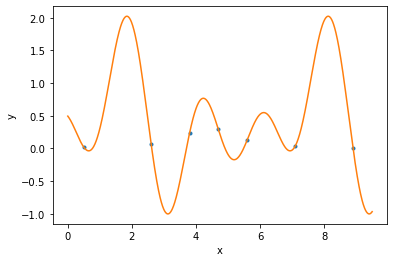

Desired Values:
[ 0.5210966   1.48836311 -0.8791892   0.68995814  0.01504305  0.18922578
  1.36532706  0.38191524]


In [12]:
#Here, via inspection of the graph in part 3, the best wavelength fell in the range of ~2pi
#This means that k=2pi/lambda=2pi/2pi=1
#This value actually doesnt change anything (n*1 = n), but I included it for variance and testing
k=1

#2D array of length n x n to create the distinct trig matrix
a = np.zeros((len(x),len(y)))

#Filling it with the pattern as shown in the lecture slides
for i in range(1,len(x)-3):
    for j in range(len(x)):
        a[j,0]=1/2
        a[j,2*i-1]=np.cos(i*x[j]*k)
        a[j,2*i]=np.sin(i*k*x[j])
        
#Solve for the a coefficients
result = np.linalg.solve(a,y)

#Function that takes in an x value and returns the interpolated y value using the a array
def Fourier(xSub):
    y = np.zeros(len(xSub))
    
    #First term
    y+=result[0]/2 
    
    #Cos terms
    count = 1
    for i in range(1,len(x),2):
        y+=result[i]*np.cos(k*count*xSub)
        count+=1
    
    #Sin terms
    count = 1
    for j in range(2,len(x),2):
        y+=result[j]*np.sin(k*count*xSub)
        count+=1
    
    return y

#Create the plotted line
yPlot = Fourier(xPlot)

#Plot both
plt.figure(3)
plt.plot(x,y,'.')
plt.plot(xPlot,yPlot)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

#Calculate the values that were asked for
yDesired = Fourier(xInter)

#Print!
print("Desired Values:")
print(yDesired)

# Part 5

None of the interpolation methods was particularly perfect, which is surprising as the function is a fairly simple, symmetric one -- a Lorentzian

$\large Lorentzian(x) = \frac{1}{\pi} \frac{\Gamma}{(x-x_0)^2 + \Gamma^2}$

The actual, calculated values for the $x$-values

1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8

are

0.02677123, 0.05450512, 0.14403162, 0.31830989, 0.14403162, 0.05450512, 0.02677123, 0.01563408


Discuss in a short paragraph which interpolation method you find to be the best choice for this Lorentzian function.  You may consider all aspects of the process such as error, usability, time to code, time to run, etc, and not simply the graphical output.  Some calculations to support your answer would also be reasonable.

In [16]:
'''
---ERROR---
The Fourier method took the most "liberty" with the portions of the function that were not directly
given (the large white spaces where the interpolation reigns), but did meet every point. The need of
a k value introduced a significant amount of "speculative" error. 

The first two methods were moderately accurate in the populated areas, but the values given in the
xInter array were VERY skewed. 

The cubic spline method most resembled the shape of the Lorentzian, and gave values that were
moderately close to the expected given above.

Error calculations (difference between expected and calculated) for each method are shown below,
and are graphed to show the accuracy of each

---Usability---
The first two were moderately straight-forward, as they just required the passing of a function.
The cubic spline needed the values to be "fit" to the proper area between points, which required the
use of a while loop. The final method also only required the passing of a function with the x values,
which was quite useable.

---Time to Code---
The first two methods were relatively quick, as they required an easy algorithm of only a few lines that outputted a simple y value.
The Lagrange polynomial took some work, but once a general algorithm was written, it was a universal working function. 
The cubic spline by FAR took the most time to code, as the tridiagonal matrix was complicated and specific, and the subbing in of values took
multiple more steps than any other method. 
The Fourier series required moderate work to complete, but it was easily generalized in functions to work with all sizes of arrays.

---Time to Run---
Timing is done below, and the numbers will be displayed to show which ones were the quickest/slowest
'''

#ERROR CALCULATIONS!!!
xAccept = np.array([1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8])
yAccept = np.array([0.02677123, 0.05450512, 0.14403162, 0.31830989, 0.14403162, 0.05450512, 0.02677123, 0.01563408])

print("ERROR!!!")

print("Polynomial Method:")
Error1 = np.sum(np.abs(Polynomial(xAccept)-yAccept))
print(Error1)
print('\n')

print("Lagrange Method:")
Error2 = np.sum(np.abs(Lagrange(x,xAccept,len(x)-1)-yAccept))
print(Error2)
print('\n')

print("Cubic Spline Method:")
Error3 = np.sum(np.abs(CalcCubicSpline(xAccept)-yAccept))
print(Error3)
print('\n')

print("Fourier Method:")
Error4 = np.sum(np.abs(Fourier(xAccept)-yAccept))
print(Error4)
print('\n')


#Time to calculate runtime!
xTest = xInter

print("TIMES!!!")
#NOW WE RACE!!!
print("Polynomial Method:")
%timeit Polynomial(xAccept)

print('\n')

print("Lagrange Method:")
%timeit Lagrange(x,xAccept,len(x)-1)

print('\n')

print("Cubic Spline Method:")
%timeit CalcCubicSpline(xAccept)

print('\n')

print("Fourier Method:")
%timeit Fourier(xAccept)

print('''
Therefore, while the fourier method is the fastest, it is wildly inaccurate. The best results were in the cubic spline, which was fast AND accurate.
While taking a longer time to code (as a result of more complexity), the cubic spline method is the best fit for the curve!
''')

ERROR!!!
Polynomial Method:
0.9563225293625573


Lagrange Method:
0.9563225293621658


Cubic Spline Method:
0.08350876132299781


Fourier Method:
5.291598650337609


TIMES!!!
Polynomial Method:
265 µs ± 33.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Lagrange Method:
211 µs ± 17.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Cubic Spline Method:
161 µs ± 7.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Fourier Method:
31.4 µs ± 1.99 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Therefore, while the fourier method is the fastest, it is wildly inaccurate. The best results were in the cubic spline, which was fast AND accurate.
While taking a longer time to code (as a result of more complexity), the cubic spline method is the best fit for the curve!



## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.